In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features_df = pd.read_csv("../../data/cnv_df_128_tw.csv")
features_df.head()
label_df = pd.read_csv("../../data/final_labels.csv")
label_df.index = label_df['File ID']

In [3]:
labels = label_df.loc[features_df['file_name']]['LABEL']
labels_more = label_df.loc[features_df['file_name']]['final_label']
projects = label_df.loc[features_df['file_name']]['Project ID']

### Using t-SNE 

/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 954 samples in 0.000s...
[t-SNE] Computed neighbors for 954 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 954 / 954
[t-SNE] Mean sigma: 1.504980
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.744385
[t-SNE] KL divergence after 1000 iterations: 1.264252


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

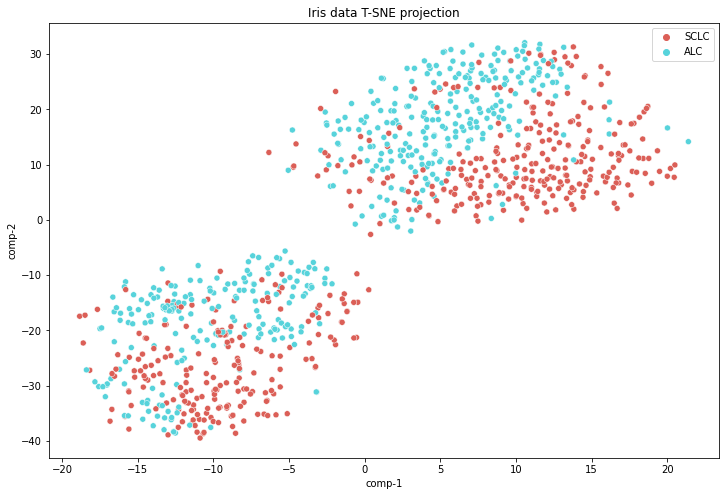

In [4]:
X = features_df.iloc[:,1:]
Y = labels
tsne = TSNE(n_components=2, verbose=1, random_state=13)
z = tsne.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["y_more"] = labels_more
df["projects"] = projects
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection") 

## Using PCA

[Text(0.5, 1.0, 'Iris data PCA projection')]

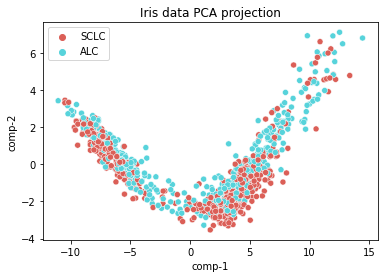

In [5]:
X = features_df.iloc[:,1:]
Y = labels
pca = PCA(n_components=2)
z = pca.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data PCA projection") 

## 10 fold cross validation

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from mlmodels import cross_validate_custom

In [7]:
VC = VotingClassifier(estimators=[('SVM', SVC(kernel = 'rbf', probability=True)),
 ('RF', RandomForestClassifier(n_estimators=100))],voting='soft')
estimators = [SVC(kernel='rbf',probability=True), RandomForestClassifier(n_estimators=100),VC]

In [8]:
result = []
for estimator in estimators:
    result.append(cross_validate_custom(X,Y,estimator))
result = pd.DataFrame(result,index = ['SVM','RF','Voting'])
result


,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std
SVM,0.896184,0.031066,0.897562,0.031455,0.897004,0.031402,0.896141,0.031111,0.954208,0.018949
RF,0.874167,0.031949,0.875718,0.032619,0.874430,0.032466,0.873980,0.032048,0.934747,0.024212
Voting,0.893070,0.025224,0.893963,0.025130,0.893347,0.025413,0.892964,0.025262,0.956974,0.018902
